In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import patsy
import scipy.stats as stats
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble  import RandomForestRegressor
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

import multiprocessing
import xgboost as xgb

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import multiprocessing
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [3]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', 100)


In [4]:
path = "/Users/rafa/Desktop/Project/Data/FM 2023.csv"
df = pd.read_csv(path)

In [5]:
#count = (df["Values"] == 347975206).sum()
#df.drop(df[df["Values"] == 347975206].index, inplace=True)

In [6]:
#overcharged_players = df.loc[df["Values"] == 347975206]

In [7]:
count = (df["Values"] >= 50000000).sum()
df.drop(df[df["Values"] >= 500000006].index, inplace=True)


In [8]:
df.drop(df[df["Values"] > 50000000].index, inplace=True)


In [9]:
count = (df["Values"] <= 50000).sum()
count

164

In [10]:
df.drop(df[df["Values"] <= 50000].index, inplace=True)


In [11]:
df

,Name,Position,Age,ca,pa,Nationality,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,Current reputation,Domestic reputation,World reputation,Race,RCA,Colour of skin,Date of birth,Number of national team appearances,Goals scored for the national team,Salary,Rental club,UID
9,Lionel Messi,AM/S RC,35,180,200,"Argentina,Spain",Paris Saint-Germain,15,15,20,17,19,18,10,16,4,4,19,17,7,20,7,17,10,16,11,20,18,20,20,14,13,5,12,7,15,15,18,6,14,15,12,9,16,9,18,6,12,2,2,3,2,2,2,2,1,3,1,3,17,18,5,17,19,17,15,14,1,1,1,1,1,1,1,8,12,8,11,19,20,19,169,67,20,12,43973205,9374,9359,9267,Mediterranean_Hispanic,172,3,1987/6/24,162,86,776712.0,NaN,7458500
10,Luka Modrić,M C,36,179,180,Croatia,R. Madrid,16,16,17,9,20,13,8,14,7,8,19,14,11,19,12,17,14,18,18,19,18,17,13,14,15,15,17,16,12,14,13,7,13,13,13,8,15,12,16,11,16,2,2,1,3,3,1,1,2,1,2,1,10,15,5,17,17,20,19,17,1,1,1,1,1,1,14,8,20,5,1,15,1,1,172,67,13,20,30331138,9000,9265,9000,Northern_European,176,5,1985/9/9,152,22,321918.0,NaN,653054
28,Thiago Silva,D C,37,168,174,"Brazil,France",Chelsea,4,5,9,7,14,8,17,7,7,17,13,14,16,13,17,17,15,20,17,13,17,15,8,19,8,19,15,14,10,12,16,13,14,10,14,14,15,7,13,11,8,4,2,2,3,1,3,2,2,1,1,2,13,17,6,15,11,20,18,15,1,1,20,1,1,1,1,1,1,1,1,1,1,1,183,79,8,20,26674923,8400,8250,7750,Mixed_Race,164,12,1984/9/22,107,7,114999.0,NaN,8833628
30,N'Golo Kanté,DM/M C,31,167,170,"France,Mali",Chelsea,6,12,11,10,14,8,10,10,6,12,15,9,19,14,15,20,15,14,16,14,16,19,13,5,15,15,20,20,14,13,15,7,18,14,18,11,19,5,20,8,10,1,3,2,2,1,3,3,1,2,3,2,18,13,1,17,15,20,15,15,1,1,1,1,1,1,18,12,20,12,10,14,12,1,168,72,8,20,48067182,8350,8200,8000,African_Caribbean,156,17,1991/3/29,53,2,336376.0,NaN,85081880
35,Toni Kroos,DM/M C,32,166,176,Germany,R. Madrid,19,18,14,13,18,14,7,17,8,8,20,13,9,16,9,17,9,18,14,18,17,10,11,12,15,14,16,11,11,10,12,10,12,12,12,14,13,10,14,7,13,1,3,2,3,1,1,3,1,1,1,3,8,14,7,10,14,17,18,17,1,1,1,1,1,1,17,10,20,1,1,11,1,1,183,76,15,20,37521116,8300,8500,7700,Northern_European,164,5,1990/1/4,105,17,359588.0,NaN,156772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8445,Callum Perry,M/AM L,16,48,140,England,Coventry City,5,9,12,5,4,4,2,5,4,2,12,1,5,9,12,5,4,4,3,8,6,7,11,9,9,1,6,11,13,13,5,8,6,12,10,3,8,8,11,13,10,3,2,1,3,3,2,1,3,1,2,3,16,12,5,11,12,11,11,17,1,1,1,1,1,1,1,20,1,1,20,1,1,1,174,0,20,7,235092,2412,2787,602,Northern_European,40,255,2005/10/12,0,0,203.0,NaN,2000218865
8446,William Gutierrez Ramirez,D R,16,46,135,England,Reading,3,3,3,4,8,1,6,3,4,7,5,2,4,7,8,9,7,6,8,6,14,10,5,4,1,8,6,6,14,14,5,2,13,10,6,1,12,7,7,5,9,2,3,1,3,3,3,2,3,2,2,1,8,11,3,10,10,10,10,12,1,1,1,20,1,15,1,1,1,1,1,1,1,1,158,0,7,20,132370,2049,1708,171,Mediterranean_Hispanic,32,10,2006/6/22,0,0,203.0,NaN,2000224941
8447,Joe Ashton,D L,16,45,135,England,Burnley,3,4,5,4,4,1,6,1,5,6,3,1,12,6,7,9,7,6,9,6,12,11,5,3,5,11,6,6,13,10,6,11,16,12,6,7,17,5,7,5,8,3,2,1,2,2,1,3,3,2,1,3,14,12,1,9,11,11,11,20,1,20,1,1,1,1,1,1,1,1,1,1,1,1,181,0,20,7,124343,2120,2270,236,Northern_European,41,3,2006/6/

In [12]:
df.columns

Index(['Name', 'Position', 'Age', 'ca', 'pa', 'Nationality', 'Club', 'Corners',
       'Crossing', 'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking',
       'Heading', 'Long Shots', 'Long Throws', 'Marking', 'Passing',
       'Penalty Taking', 'Tackling', 'Technique', 'Aggressiion',
       'Anticipation', 'Bravery', 'Composure', 'Concentration', 'Vision',
       'Decision', 'Determination', 'Flair', 'Leadership', 'Off The Ball',
       'Position.1', 'Teamwork', 'Work Rate', 'Acceleration', 'Agility',
       'Balance', 'Jumping Reach', 'Natural Fitness', 'Pace', 'Stamina',
       'Strength', 'Stability', 'Foul', 'Contest performance', 'Injury',
       'diversity', 'Aerial Reach', 'Command Of Area', 'Communication',
       'Eccentricity', 'Handling', 'Kicking', 'One On Ones', 'Reflexes',
       'Rushing Out', 'Punching', 'Throwing', 'Adaptation', 'Ambition',
       'Argue', 'Loyal', 'Resistant to stress', 'Professional',
       'Sportsmanship', 'Emotional control', 'GK', 'DL', 

In [13]:
df.drop(["Nationality","Rental club","Salary","Colour of skin","Date of birth","Number of national team appearances","Goals scored for the national team","Race","World reputation","Domestic reputation","Current reputation","RCA" ], axis=1,inplace=True)

In [14]:
df = pd.DataFrame(df)

columns_to_check = {
    "GK", "DL", "DC", "DR", "WBL", "WBR", "DM", "ML", "MC", "MR", "AML", "AMC", "AMR", "ST"
}

def find_column_name(row):
    for col_name in columns_to_check:
        if row[col_name] == 20:
            return col_name
    return None

df['Best_Position'] = df.apply(find_column_name, axis=1)


Cleaning

In [15]:
amr_df = df[(df["Best_Position"] == "AMC")]
amr_df = amr_df.reset_index(drop=True)
amr_df

,Name,Position,Age,ca,pa,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,UID,Best_Position
0,Paulo Dybala,AM/S RC,28,160,177,Associazione Sportiva Roma,16,15,18,15,18,17,13,17,4,4,17,16,4,19,9,16,10,12,11,17,14,13,17,11,14,4,14,12,14,18,18,7,10,12,12,12,13,5,11,16,13,1,2,3,3,3,3,3,2,3,1,3,14,14,12,9,9,11,13,15,1,1,1,1,1,1,1,1,1,1,12,20,15,20,177,79,20,10,20000000,14044150,AMC
1,Marco Reus,AM RLC,33,159,170,Borussia Dortmund,15,13,13,16,16,16,6,15,7,6,15,15,9,16,15,15,12,16,15,14,15,18,13,13,18,10,14,15,14,12,14,8,12,13,13,9,17,4,17,19,16,1,2,1,2,2,1,2,1,3,3,2,9,16,9,18,17,17,10,10,1,1,1,1,1,1,1,13,8,10,20,20,15,15,180,71,14,20,33067483,91013383,AMC
2,Rafa,AM RLC,29,155,158,SL Benfica,11,11,16,11,15,11,5,12,5,6,14,12,9,15,13,13,11,10,11,15,12,13,19,10,17,7,9,11,18,18,15,5,16,17,13,6,12,6,15,7,10,1,3,2,2,2,1,2,2,2,1,3,8,7,10,14,12,14,9,14,1,1,1,1,1,1,1,14,12,12,20,20,18,14,172,62,11,20,29699999,55063493,AMC
3,Pablo Sarabia,AM RLC,30,154,156,Paris Saint-Germain,15,15,15,15,17,15,7,13,5,7,15,13,6,17,10,13,11,13,13,16,14,9,15,8,15,8,15,14,15,16,15,6,12,14,13,10,14,9,15,10,15,2,1,1,1,2,1,2,2,3,4,1,7,12,10,10,12,14,14,10,1,1,1,1,10,1,1,15,13,15,17,20,19,1,174,70,20,10,36552285,67045428,AMC
4,Dejan Kulusevski,M/AM RC,22,153,171,Juventus,11,14,16,13,15,9,7,11,4,4,17,11,7,16,7,15,8,13,12,16,16,15,15,6,14,6,14,14,13,14,17,12,14,14,16,15,14,11,14,6,15,3,1,3,2,3,2,2,3,1,3,1,16,14,8,12,15,14,13,10,1,1,1,1,1,9,1,12,14,18,14,20,20,14,186,79,20,14,35000000,43295814,AMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,Archie Stevens,AM RLC,16,68,-8,Rangers,6,6,8,7,14,4,7,6,7,7,8,4,6,10,5,9,7,8,7,10,12,17,15,7,11,8,11,13,10,9,8,9,14,10,11,9,20,11,9,5,9,3,1,1,2,2,1,2,1,3,3,3,16,13,5,11,10,11,11,18,1,1,1,1,1,1,1,11,14,13,18,20,17,12,188,0,10,20,8871048,2000183425,AMC
667,Adam Berry,AM LC,16,66,-75,Manchester UFC,10,8,11,9,12,11,1,10,1,1,12,2,2,12,9,7,7,8,5,10,5,4,18,4,8,3,7,9,11,11,9,8,14,10,8,5,6,6,16,6,15,2,1,3,3,2,2,2,1,1,3,1,12,9,8,11,10,10,11,10,1,1,1,1,1,1,1,14,15,10,16,20,12,1,182,0,13,20,9678350,2000190307,AMC
668,Nevio Di Giusto,AM C,17,65,-75,FC Zürich,5,2,6,7,13,3,7,7,1,5,10,6,6,13,10,9,5,9,3,13,13,14,13,4,10,5,12,7,7,8,6,2,14,7,7,4,10,7,7,5,13,3,4,1,2,3,1,4,1,3,4,1,8,11,4,10,9,12,9,10,1,1,1,1,1,1,1,1,15,1,1,20,1,15,162,0,15,20,2977776,2000116928,AMC
669,Logan Briggs,M/AM RLC,17,60,-75,Leicester City,3,6,9,4,12,4,4,4,1,5,12,1,6,7,8,7,2,9,5,12,12,3,14,2,10,5,6,9,12,12,5,3,14,12,8,6,6,7,8,12,15,1,1,1,3,1,2,3,2,1,1,2,19,12,6,13,11,11,12,19,1,1,1,1,1,1,1,1,18,1,15,20,15,1,174,0,8,20,8861769,2000177580,AMC


Keep Attibutes


In [16]:
AMR_detailed_features = ['Corners', 'Crossing',
       'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking', 'Heading',
       'Long Shots', 'Marking', 'Passing', 'Penalty Taking',
       'Tackling', 'Technique', 'Aggressiion', 'Anticipation', 'Bravery',
       'Composure', 'Concentration', 'Vision', 'Decision', 'Determination',
       'Flair', 'Leadership', 'Off The Ball', 'Position.1', 'Teamwork',
       'Work Rate', 'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability',
        'diversity']

In [17]:
amr_df = amr_df[['Age','Values','Corners', 'Crossing',
       'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking', 'Heading',
       'Long Shots', 'Marking', 'Passing', 'Penalty Taking',
       'Tackling', 'Technique', 'Aggressiion', 'Anticipation', 'Bravery',
       'Composure', 'Concentration', 'Vision', 'Decision', 'Determination',
       'Flair', 'Leadership', 'Off The Ball', 'Position.1', 'Teamwork',
       'Work Rate', 'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability',
       'diversity', ]].applymap(lambda x: np.nan if x < 0 else x).dropna()


In [18]:
amr_df

,Age,Values,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,diversity
0,28,20000000,16,15,18,15,18,17,13,17,4,17,16,4,19,9,16,10,12,11,17,14,13,17,11,14,4,14,12,14,18,18,7,10,12,12,12,13,13
1,33,33067483,15,13,13,16,16,16,6,15,6,15,15,9,16,15,15,12,16,15,14,15,18,13,13,18,10,14,15,14,12,14,8,12,13,13,9,17,16
2,29,29699999,11,11,16,11,15,11,5,12,6,14,12,9,15,13,13,11,10,11,15,12,13,19,10,17,7,9,11,18,18,15,5,16,17,13,6,12,10
3,30,36552285,15,15,15,15,17,15,7,13,7,15,13,6,17,10,13,11,13,13,16,14,9,15,8,15,8,15,14,15,16,15,6,12,14,13,10,14,15
4,22,35000000,11,14,16,13,15,9,7,11,4,17,11,7,16,7,15,8,13,12,16,16,15,15,6,14,6,14,14,13,14,17,12,14,14,16,15,14,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,16,8871048,6,6,8,7,14,4,7,6,7,8,4,6,10,5,9,7,8,7,10,12,17,15,7,11,8,11,13,10,9,8,9,14,10,11,9,20,9
667,16,9678350,10,8,11,9,12,11,1,10,1,12,2,2,12,9,7,7,8,5,10,5,4,18,4,8,3,7,9,11,11,9,8,14,10,8,5,6,15
668,17,2977776,5,2,6,7,13,3,7,7,5,10,6,6,13,10,9,5,9,3,13,13,14,13,4,10,5,12,7,7,8,6,2,14,7,7,4,10,13
669,17,8861769,3,6,9,4,12,4,4,4,5,12,1,6,7,8,7,2,9,5,12,12,3,14,2,10,5,6,9,12,12,5,3,14,12,8,6,6,15


In [19]:
# f_regression for pearsons correlation
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X = amr_df[AMR_detailed_features]
y = amr_df["Values"]
# define feature selection
fs = SelectKBest(score_func=f_regression, k = 15)
# apply feature selection
X_selected = fs.fit_transform(X, y)

In [20]:
np.sort(fs.scores_)


array([3.52908442e-04, 3.66767708e-03, 3.00747743e-02, 9.73225409e-02,
       1.06704077e-01, 1.24946754e-01, 1.61682264e-01, 1.82005111e-01,
       1.82352560e-01, 1.89073903e-01, 1.93769972e-01, 3.05463221e-01,
       3.49598564e-01, 3.63427359e-01, 4.36980010e-01, 5.44049741e-01,
       5.71279995e-01, 5.84771352e-01, 6.33309936e-01, 6.72863861e-01,
       8.43839743e-01, 1.14082251e+00, 1.48367966e+00, 2.19077941e+00,
       2.35617041e+00, 2.42174161e+00, 2.51317983e+00, 3.34484977e+00,
       3.97173245e+00, 4.45968799e+00, 4.47455488e+00, 5.29756936e+00,
       6.71841117e+00, 7.06858627e+00, 9.35348307e+00, 1.43701991e+01,
       1.86188536e+01])

In [21]:
AMR_essential_ft = list(fs.get_feature_names_out(AMR_detailed_features))
AMR_essential_ft

['Dribbling',
 'Finishing',
 'Heading',
 'Marking',
 'Decision',
 'Determination',
 'Flair',
 'Leadership',
 'Position.1',
 'Work Rate',
 'Acceleration',
 'Balance',
 'Natural Fitness',
 'Pace',
 'Stability']

In [22]:
if 'Age' not in AMR_essential_ft:#
    AMR_essential_ft+=['Age']
if 'Values' not in AMR_essential_ft:#
    AMR_essential_ft+=['Values']

In [23]:

amr_df = amr_df.loc[:, AMR_essential_ft]

In [24]:

# Assuming df is your DataFrame
max_age = amr_df['Age'].max()
amr_df['reversed_age'] = max_age - amr_df['Age']
amr_df.drop(columns=['Age'], inplace=True)


Correlation

In [25]:
#looking for correlation
corr_matrix = amr_df.corr()
corr_matrix

,Dribbling,Finishing,Heading,Marking,Decision,Determination,Flair,Leadership,Position.1,Work Rate,Acceleration,Balance,Natural Fitness,Pace,Stability,Values,reversed_age
Dribbling,1.000000,0.300346,-0.000788,-0.047598,0.156435,0.180643,0.457848,0.083909,0.013725,0.052232,0.195680,0.360644,-0.035715,0.159145,-0.109864,0.060057,-0.343973
Finishing,0.300346,1.000000,0.329363,0.021058,0.251493,0.152233,0.138544,0.238241,0.061210,0.132647,0.078698,0.332873,0.102802,0.077473,0.081332,0.047041,-0.424597
Heading,-0.000788,0.329363,1.000000,0.334938,0.119836,0.065158,-0.167020,0.219030,0.276639,0.178578,-0.054418,0.208686,0.079144,-0.000005,0.085736,-0.117424,-0.248710
Marking,-0.047598,0.021058,0.334938,1.000000,0.127625,0.033707,-0.225336,0.205044,0.578311,0.253646,-0.073517,0.117099,0.025515,-0.054976,0.127245,-0.057132,-0.130320
Decision,0.156435,0.251493,0.119836,0.127625,1.000000,0.061602,0.078940,0.280548,0.218085,0.137635,-0.105826,0.147564,-0.030893,-0.126160,0.143384,-0.081511,-0.377383
Determination,0.180643,0.152233,0.065158,0.033707,0.061602,1.000000,0.157569,0.200485,0.044927,0.240180,0.019172,0.222591,0.115808,0.034526,0.122148,0.059242,-0.183064
Flair,0.457848,0.138544,-0.167020,-0.225336,0.078940,0.157569,1.000000,-0.004908,-0.190479,-0.101303,0.115564,0.208676,-0.019240,0.047837,-0.100321,0.088636,-0.256899
Leadership,0.083909,0.238241,0.219030,0.205044,0.280548,0.200485,-0.004908,1.000000,0.249226,0.244928,-0.165569,0.234214,0.000585,-0.132757,0.166613,-0.099713,-0.435791
Position.1,0.013725,0.061210,0.276639,0.578311,0.218085,0.044927,-0.190479,0.249226,1.000000,0.286829,-0.123623,0.170592,0.025981,-0.081747,0.111843,-0.081376,-0.204118
Work Rate,0.052232,0.132647,0.178578,0.253646,0.137635,0.240180,-0.101303,0.244928,0.286829,1.000000,0.108045,0.244087,0.205594,0.085289,0.148180,0.061176,-0.235051


Text(0.5, 1.0, 'Correlation Heatmap')

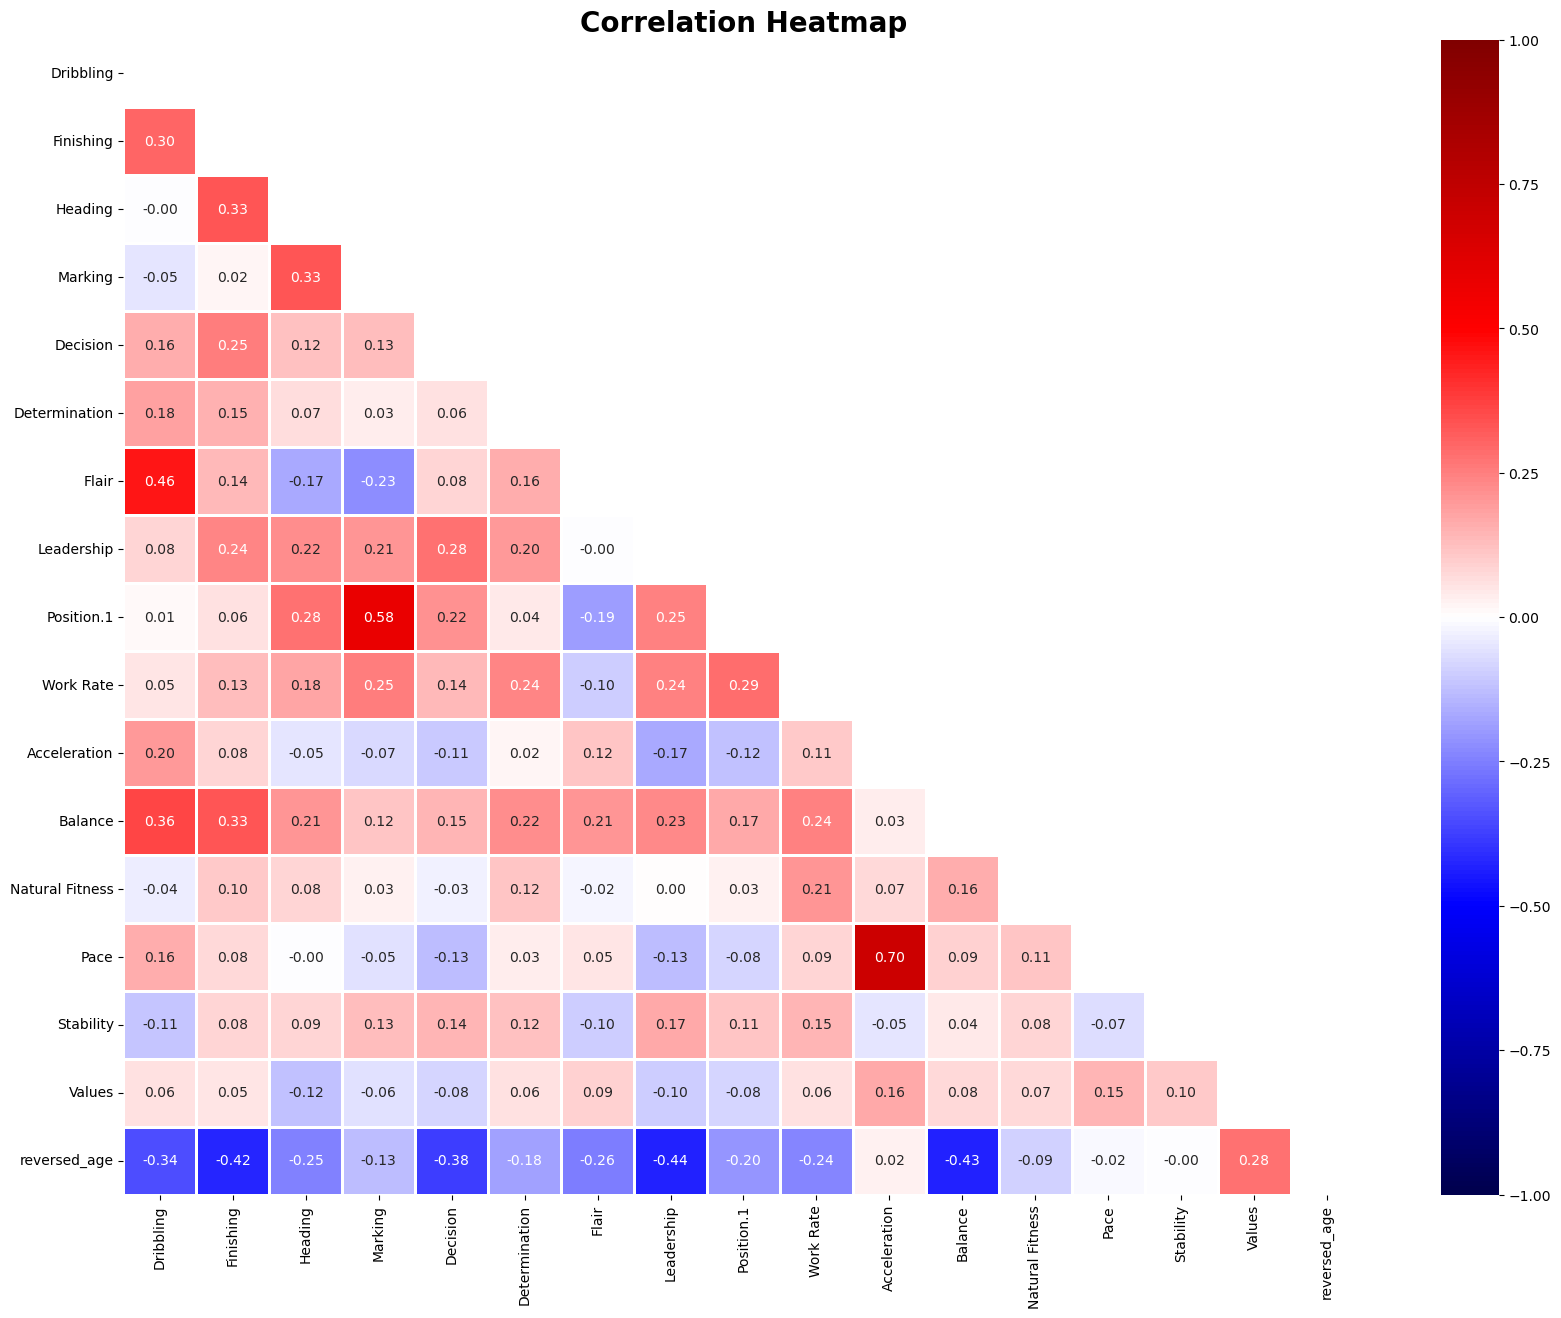

In [26]:

fig = plt.figure(figsize=[20,15])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=20)
#plt.savefig('heatmap1.png',transparent=True, bbox_inches='tight')

Split

Feature Selection

In [27]:
""" 
# Assuming df is your DataFrame
max_age = amr_df['Age'].max()
amr_df['reversed_age'] = max_age - amr_df['Age']
amr_df.drop(columns=['Age'], inplace=True)
 """

" \n# Assuming df is your DataFrame\nmax_age = amr_df['Age'].max()\namr_df['reversed_age'] = max_age - amr_df['Age']\namr_df.drop(columns=['Age'], inplace=True)\n "

In [28]:
X = amr_df.copy()
y = X.pop("Values")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536 entries, 479 to 102
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Dribbling        536 non-null    int64
 1   Finishing        536 non-null    int64
 2   Heading          536 non-null    int64
 3   Marking          536 non-null    int64
 4   Decision         536 non-null    int64
 5   Determination    536 non-null    int64
 6   Flair            536 non-null    int64
 7   Leadership       536 non-null    int64
 8   Position.1       536 non-null    int64
 9   Work Rate        536 non-null    int64
 10  Acceleration     536 non-null    int64
 11  Balance          536 non-null    int64
 12  Natural Fitness  536 non-null    int64
 13  Pace             536 non-null    int64
 14  Stability        536 non-null    int64
 15  reversed_age     536 non-null    int64
dtypes: int64(16)
memory usage: 71.2 KB


In [50]:
y_train

479      539565
604     9200000
61     12614352
145    18440001
353     5079742
         ...   
71     11365142
106     2264720
270      824240
435      515750
102     6328893
Name: Values, Length: 536, dtype: int64

In [55]:
X_test.describe()

,Dribbling,Finishing,Heading,Marking,Decision,Determination,Flair,Leadership,Position.1,Work Rate,Acceleration,Balance,Natural Fitness,Pace,Stability,reversed_age
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,13.237037,11.451852,7.688889,6.614815,11.814815,12.429630,13.777778,8.629630,8.125926,11.955556,12.688889,11.592593,12.266667,12.362963,11.888889,17.037037
std,1.985798,2.075869,2.522930,2.154430,1.901238,2.856103,2.093582,3.275282,2.407791,2.368533,1.493602,2.357257,2.382148,1.347233,2.466694,4.961655
min,4.000000,5.000000,1.000000,1.000000,5.000000,4.000000,7.000000,1.000000,3.000000,6.000000,8.000000,3.000000,6.000000,9.000000,6.000000,7.000000
25%,12.000000,10.000000,6.000000,5.000000,11.000000,11.000000,13.000000,7.000000,6.000000,10.500000,12.000000,10.000000,11.000000,12.000000,11.000000,13.000000
50%,13.000000,12.000000,8.000000,6.000000,12.000000,13.000000,14.000000,9.000000,8.000000,12.000000,13.000000,12.000000,12.000000,12.000000,12.000000,17.000000
75%,15.000000,13.000000,9.000000,8.000000,13.000000,14.000000,15.000000,11.000000,10.000000,13.000000,14.000000,13.000000,14.000000,13.000000,13.000000,22.000000
max,17.000000,17.000000,14.000000,13.000000,16.000000,20.000000,19.000000,16.000000,14.000000,18.000000,18.000000,17.000000,17.000000,17.000000,20.000000,25.000000


In [56]:
y_test.describe()

count    1.350000e+02
mean     8.222459e+06
std      9.763349e+06
min      8.201500e+04
25%      2.221585e+06
50%      4.139040e+06
75%      9.384175e+06
max      3.804529e+07
Name: Values, dtype: float64

Feature Selection - Variance

In [29]:
range_var_df = (pd.DataFrame({
                'Range': X_train.max() - X_train.min(),
                'Variance': X_train.var()})
                .sort_values(by='Variance'))

In [30]:
range_var_df.head()

,Range,Variance
Pace,9,1.970760
Acceleration,10,2.278390
Dribbling,12,3.593859
Decision,11,3.713764
Finishing,13,3.907644


In [31]:
range_var_df.tail()

,Range,Variance
Heading,15,6.106723
Balance,15,6.331762
Determination,16,9.227284
Leadership,17,10.057829
reversed_age,26,27.831716


ML

In [32]:
""" from xgboost import XGBRegressor

model_pipeline = make_pipeline(#StandardScaler(), 
                               XGBRegressor(random_state=123))
#y_scaler = StandardScaler()
#y_train_standardized = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()

param_grid = {"xgbregressor__n_estimators": [100, 500, 1000],
              "xgbregressor__max_depth": [3, 5, 7],
              "xgbregressor__learning_rate": [0.00000001, 0.0000001, 0.000000001]}

xgb_search = RandomizedSearchCV(model_pipeline,
                                param_grid,
                                scoring="neg_mean_absolute_percentage_error",
                                n_iter=50,
                                cv=5,
                                n_jobs=-1,
                                random_state=123)

xgb_search.fit(X_train, y_train)

best_score_search_xgb = xgb_search.best_score_

print(f"{best_score_search_xgb} MAPE")
 """

' from xgboost import XGBRegressor\n\nmodel_pipeline = make_pipeline(#StandardScaler(), \n                               XGBRegressor(random_state=123))\n#y_scaler = StandardScaler()\n#y_train_standardized = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()\n\nparam_grid = {"xgbregressor__n_estimators": [100, 500, 1000],\n              "xgbregressor__max_depth": [3, 5, 7],\n              "xgbregressor__learning_rate": [0.00000001, 0.0000001, 0.000000001]}\n\nxgb_search = RandomizedSearchCV(model_pipeline,\n                                param_grid,\n                                scoring="neg_mean_absolute_percentage_error",\n                                n_iter=50,\n                                cv=5,\n                                n_jobs=-1,\n                                random_state=123)\n\nxgb_search.fit(X_train, y_train)\n\nbest_score_search_xgb = xgb_search.best_score_\n\nprint(f"{best_score_search_xgb} MAPE")\n '

In [58]:
from sklearn.preprocessing import MinMaxScaler


In [33]:
from xgboost import XGBRegressor#
from sklearn.model_selection import KFold

model_pipeline = make_pipeline(#MinMaxScaler(), 
                               XGBRegressor(random_state=123))
#y_scaler = StandardScaler()
#y_train_standardized = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()

param_grid = {"xgbregressor__n_estimators": [100, 500, 1000],
              "xgbregressor__max_depth": [3, 5, 7],
              "xgbregressor__learning_rate": [0.00000001, 0.0000001, 0.000000001]}

xgb_search = GridSearchCV(model_pipeline,
                          param_grid,
                          scoring="neg_mean_absolute_percentage_error",
                          cv=5,
                          n_jobs=-1)

xgb_search.fit(X_train, y_train)

best_score_search_xgb = xgb_search.best_score_

print(f"{best_score_search_xgb} MAPE")


-0.999514973168759 MAPE


In [54]:
xgb_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('xgbregressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None, gpu_id=None,
                                                     grow_policy=None,
                                                     im...
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=123, ...))]),
             n_jobs=-1,
             param_grid={'xgbregressor__learning_rate': [1e-08, 1e-07, 1e-09],
                         'xgbregressor__max_depth': [3, 5, 7],
                         'xgbregressor__n_estimators': [100, 500, 1000]},
             scoring='neg_mean_absolute_percentage_error')

In [34]:
best_score_search_xgb

-0.999514973168759

Metric

In [35]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [36]:
dt_predictions = xgb_search.predict(X_test)

In [37]:
X_test

,Dribbling,Finishing,Heading,Marking,Decision,Determination,Flair,Leadership,Position.1,Work Rate,Acceleration,Balance,Natural Fitness,Pace,Stability,reversed_age
361,12,13,10,6,12,16,14,8,8,13,13,11,11,12,12,19
158,15,11,7,7,12,12,17,8,13,10,13,17,10,14,10,17
480,12,10,8,6,10,13,16,7,7,11,15,13,13,14,10,22
641,13,7,2,6,13,7,13,1,6,12,13,3,7,12,8,24
275,14,14,12,5,10,10,14,11,6,11,12,12,15,13,11,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,15,9,8,6,12,14,16,7,5,8,14,13,14,13,12,20
551,14,10,4,4,7,11,16,4,5,12,15,12,14,13,18,23
212,13,10,8,9,10,9,13,10,12,12,13,11,10,12,15,12
18,16,13,6,6,14,14,14,12,9,13,14,16,14,12,16,11


In [38]:
dt_predictions

array([ 403.66168,  403.66168, 1774.2325 ,  581.598  ,  403.66168,
        403.66168,  403.66168,  552.7731 ,  987.8932 , 1062.8203 ,
        552.7731 ,  403.66168,  403.66168,  552.7731 ,  403.66168,
        552.7731 , 1062.8203 , 1311.5126 ,  403.66168, 1062.8203 ,
        403.66168,  581.598  ,  403.66168,  403.66168,  581.598  ,
        987.8932 , 1062.8203 , 1774.2325 ,  403.66168, 1587.6279 ,
        403.66168,  987.8932 , 1774.2325 ,  403.66168, 1587.6279 ,
       1062.8203 ,  403.66168,  403.66168,  403.66168,  581.598  ,
       1774.2325 , 1062.8203 ,  403.66168,  403.66168, 1774.2325 ,
        581.598  ,  987.8932 , 1587.6279 ,  403.66168,  552.7731 ,
        581.598  ,  552.7731 , 1062.8203 ,  581.598  ,  403.66168,
       1774.2325 , 1774.2325 ,  403.66168,  552.7731 , 1062.8203 ,
       1587.6279 ,  403.66168, 1587.6279 ,  552.7731 ,  987.8932 ,
       1311.5126 , 1774.2325 ,  552.7731 , 1062.8203 ,  403.66168,
       1062.8203 ,  403.66168,  552.7731 ,  552.7731 , 1587.62

In [59]:
y_test , dt_predictions

(361     1224999
 158     3714162
 480     6744919
 641     9090000
 275     3022861
          ...   
 420     4399999
 551    30900198
 212     1826971
 18     25680440
 235     2794241
 Name: Values, Length: 135, dtype: int64,
 array([ 403.66168,  403.66168, 1774.2325 ,  581.598  ,  403.66168,
         403.66168,  403.66168,  552.7731 ,  987.8932 , 1062.8203 ,
         552.7731 ,  403.66168,  403.66168,  552.7731 ,  403.66168,
         552.7731 , 1062.8203 , 1311.5126 ,  403.66168, 1062.8203 ,
         403.66168,  581.598  ,  403.66168,  403.66168,  581.598  ,
         987.8932 , 1062.8203 , 1774.2325 ,  403.66168, 1587.6279 ,
         403.66168,  987.8932 , 1774.2325 ,  403.66168, 1587.6279 ,
        1062.8203 ,  403.66168,  403.66168,  403.66168,  581.598  ,
        1774.2325 , 1062.8203 ,  403.66168,  403.66168, 1774.2325 ,
         581.598  ,  987.8932 , 1587.6279 ,  403.66168,  552.7731 ,
         581.598  ,  552.7731 , 1062.8203 ,  581.598  ,  403.66168,
        1774.2325 , 177

In [39]:
dt_mae = mean_absolute_error(y_true = y_test, y_pred = dt_predictions)
dt_rmse = mean_squared_error(y_true = y_test, y_pred = dt_predictions, squared=False)
dt_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = dt_predictions)
dt_r2 = r2_score(y_true = y_test, y_pred = dt_predictions)

In [40]:
pd.DataFrame({"MAE": [dt_mae],
              "RMSE": [dt_rmse],
              "MAPE": [dt_mape],
              "R2": [dt_r2]},
             index=["xgboost"])

,MAE,RMSE,MAPE,R2
xgboost,8.221588e+06,1.273609e+07,0.999612,-0.714365


In [41]:
X_test.head()


,Dribbling,Finishing,Heading,Marking,Decision,Determination,Flair,Leadership,Position.1,Work Rate,Acceleration,Balance,Natural Fitness,Pace,Stability,reversed_age
361,12,13,10,6,12,16,14,8,8,13,13,11,11,12,12,19
158,15,11,7,7,12,12,17,8,13,10,13,17,10,14,10,17
480,12,10,8,6,10,13,16,7,7,11,15,13,13,14,10,22
641,13,7,2,6,13,7,13,1,6,12,13,3,7,12,8,24
275,14,14,12,5,10,10,14,11,6,11,12,12,15,13,11,14


In [42]:
y_test.head

<bound method NDFrame.head of 361     1224999
158     3714162
480     6744919
641     9090000
275     3022861
         ...   
420     4399999
551    30900198
212     1826971
18     25680440
235     2794241
Name: Values, Length: 135, dtype: int64>

In [43]:
np.array([y_test])


array([[ 1224999,  3714162,  6744919,  9090000,  3022861,  2534192,
          786069,  4758401, 38045289,  2638543,  3733214,  2921813,
         1947586,  4139040,  2263576,  4111059, 18601140,   196580,
          987305,  7503943,  3270160, 10400000,  1524826,  1951000,
        35052702, 37800000,  4241158,  5329193,  2792999,  7875679,
          104553, 11275305, 24620000,   214485,  1755588,   994756,
         9974249,  4079998, 11072215,   268126, 22966364,  4499063,
        13868925,  3618942,  2309999,  3864650, 13278734,  5515748,
        12931966,  3957313,  1250454,  2429998,  3285844, 35000000,
         9878407,  2662000, 25597056,  1870531,  4899999,  3508676,
         2902399,  4889922, 29699999,  4854754,  7399214,  8871048,
         7416205,  2168068, 23823150,  7792090, 33405620,  1247383,
         1052768,  4456544,  6610487,  5086844,    82015, 10246324,
         2486631,  3023998, 33000000,   673133,  5101107, 10962000,
          203999,  7972902,  9691568,  1635081, 

In [44]:
#amr_df['predicted_values'] = xgb_search.predict(amr_df.loc[:,cols])


In [45]:
#xgb_search

In [46]:
# Assuming you have trained your model and obtained predictions on the testing dataset
xgpred = xgb_search.predict(X_test)
# Create a new DataFrame for predictions and actual values
results_df = pd.DataFrame({'Predicted Market Value (xg)': xgpred ,
                           'Actual Market Value': y_test})

In [47]:
results_df


,Predicted Market Value (xg),Actual Market Value
361,403.661682,1224999
158,403.661682,3714162
480,1774.232544,6744919
641,581.598022,9090000
275,403.661682,3022861
...,...,...
420,1587.627930,4399999
551,1774.232544,30900198
212,403.661682,1826971
18,1587.627930,25680440


In [48]:
amr_df

,Dribbling,Finishing,Heading,Marking,Decision,Determination,Flair,Leadership,Position.1,Work Rate,Acceleration,Balance,Natural Fitness,Pace,Stability,Values,reversed_age
0,18,15,13,4,14,13,17,11,4,12,14,18,10,12,13,20000000,13
1,13,16,6,6,15,18,13,13,10,15,14,14,12,13,17,33067483,8
2,16,11,5,6,12,13,19,10,7,11,18,15,16,17,12,29699999,12
3,15,15,7,7,14,9,15,8,8,14,15,15,12,14,14,36552285,11
4,16,13,7,4,16,15,15,6,6,14,13,17,14,14,14,35000000,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,8,7,7,7,12,17,15,7,8,13,10,8,14,10,20,8871048,25
667,11,9,1,1,5,4,18,4,3,9,11,9,14,10,6,9678350,25
668,6,7,7,5,13,14,13,4,5,7,7,6,14,7,10,2977776,24
669,9,4,4,5,12,3,14,2,5,9,12,5,14,12,6,8861769,24
